<a href="https://colab.research.google.com/github/kjblack013/Portfolio-Projects/blob/main/Customer_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real-life Applications of Data Science:**
# **Creating a recommendation system based on customer purchase habits!**

#### In this project, we will be taking a look at a dataset of customer transactions. We will then create a recommender system in order to better market the products in the future.

<img src="https://www.piedmont.org/media/BlogImages/How%20to%20choose%20safe%20cosmetics.jpg"  width="400" height="240">

#### First, we need to load our packages, as well as our dataset. In this case, the dataset we will be using is called "Cosmetics." It contains a various customer transactions in its rows and various items that may or may not be purchased in its columns.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
data = pd.read_csv('./Cosmetics.csv')

In [ ]:
data = data.rename(columns={'Trans. ': 'Customer'})

In [ ]:
data['Customer'] = data['Customer'].apply(str)

## The Dataset

#### The dataset being used provides us with rows of transactions and columns of various items. We can see that the only values are either 1's or 0's. A "1" corresponds with a purhcase, while a "0" means the item was not purchased.

#### After checking for missing values, we can see that we do not have any data missing.

#### We will also be dropping the "Customer" column in order to make our data completely binary.

In [ ]:
data.head(6)

,Customer,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner
0,1,0,1,1,1,1,0,1,1,1,0,0,0,0,1
1,2,0,0,1,0,1,0,1,1,0,0,1,1,0,0
2,3,0,1,0,0,1,1,1,1,1,1,1,1,1,0
3,4,0,0,1,1,1,0,1,0,0,0,1,0,0,1
4,5,0,1,0,0,1,0,1,1,1,1,0,1,1,0
5,6,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
data.isnull().sum()

Customer           0
Bag                0
Blush              0
Nail Polish        0
Brushes            0
Concealer          0
Eyebrow Pencils    0
Bronzer            0
Lip liner          0
Mascara            0
Eye shadow         0
Foundation         0
Lip Gloss          0
Lipstick           0
Eyeliner           0
dtype: int64

In [ ]:
df = data.drop(columns=['Customer'],axis=0)

### Initial thoughts

#### Initially, my instinct was to determine distance by number of transactions. I wrote code that would iterate through each row, gather the number of transactions, then compare them to one row, and take the average. The code then does this for each row and creates a new column called "Average Distance". However, this code took a very long time to run and I wasn't quite sure how much value I could gain from it. The code is shown below, but commented out.

In [ ]:
#distances = []  # List to store the average distances

#for index, row in df.iterrows():
   # current_row = df.iloc[index]
   # other_rows = df.drop(index)  # Remove the current row from the DataFrame

  #  row_distances = []  # List to store the distances for the current row

    #for _, other_row in other_rows.iterrows():
     #   distance = dist(current_row, other_row)
       # row_distances.append(distance)

 #   average_distance = sum(row_distances) / len(row_distances)
   # distances.append(average_distance)

# Add the distances as a new column to the DataFrame
#df['AverageDistance'] = distances


In [ ]:
#df['AverageDistance'].describe()


## **The Apriori Algorithm**

#### I decided to do some more research on recommendation systems, as this was my first time creating one of my own. In my research one algorithm in particular seemed to fit exactly what I was looking for. This algorithm, entitled the Apriori Algorithm, is commonly used for basket analysis, which is the study of a customer's basket while shopping. What's even better is that this algorithm works well with either boolean or binary data.

#### So you're telling me this algorithm is often used for the exact problem we're trying to solve AND our dataset is already set up perfectly to utilize it?

## Count me in!
<img src="https://media.tenor.com/kqbuhssTvc8AAAAM/iota-iota-foundation.gif"  width="300" height="200">

## Whoa whoa wait...Not so fast! We need to understand how it works first!


## **The Apriori Algorithm: How Does It Work?**

<img src="https://miro.medium.com/v2/resize:fit:2000/1*Uju7aWZpiiqS3wDsz8kxJQ.jpeg" width="300" height="175">

#### The Apriori Algorithm works by using the notion of support. The support is the number of transactions in which a specific product, or combination of products, occurs. The algorithm works in steps.

- It begins by counting the support for each product, in our case cosmetic products. We can then decide upon a threshold in order to filter out products that are not purchased as frequently.

- Once these low support products are filtered out, it groups pairs of products. However, it will ignore any product pairs containing items below our support threshold. This makes the algorithm more efficient.

- Once it has the items in pairs, it will once again filter out any pairs that are below the support threshold. If some remain, it will move on to sets of three items, and so on.

#### Therefore, lowering the threshold will allow for larger item combinations to be included.

## **Putting The Algorithm to Use**

### Determine Frequent Itemsets
#### We start by determining the most frequent items or sets of items. We can adjust our threshold based on the results.

### Association Rules
#### Once we have our frequent itemsets, we can convert them into our assocation rules. To put it simply, association rules are rules that tell us, that if the customer buys product X, they are also likely to buy product Y.

#### In turn, for pairs of items, if the customer buys products X and Y, then they are likely to purchase product Z as well. There are a few  more measures to choose from when it comes to association rules. The most important are as follows:

- **Confidence:** The percentage of cases in which the rule is true. 100% confidence means that this association always occurs, while 50% means that the rule only holds true 50% of the time.

- **Lift:** Lift is simply a measure that tells us whether the probability of buying one item increases or decreases given the purchase of another item (or group of items). For example, a lift of 1 would mean that the purchase of the one item had no effect, positively or negatively on the probability of purchasing the other item. However, if the lift was 1.5, it would mean that the customer is 1.5x (or 50%) more likely to purchase the subsequent item.

### **Now, let's try it out!**

#### We'll start with a minimum support threshold of 0.2.

In [ ]:
## Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Print the frequent itemsets
print("Frequent Itemsets:")
frequent_itemsets

Frequent Itemsets:


,support,itemsets
0,0.363,(Blush)
1,0.280,(Nail Polish)
2,0.442,(Concealer)
3,0.279,(Bronzer)
4,0.234,(Lip liner)
5,0.357,(Mascara)
6,0.381,(Eye shadow)
7,0.536,(Foundation)
8,0.490,(Lip Gloss)
9,0.322,(Lipstick)


#### This resulted in 22 different frequent itemsets, some single items and some pairs.
#### Now, lets use this set of frequent items to calculate our association rules. For this project, we will be using "Lift" as our primary measurement.

In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Print the association rules
print("\nAssociation Rules:")
rules.sort_values('lift', ascending = False)


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Eye shadow),(Mascara),0.381,0.357,0.321,0.842520,2.359999,0.184983,4.083050
7,(Mascara),(Eye shadow),0.357,0.381,0.321,0.899160,2.359999,0.184983,6.138417
4,(Eyeliner),(Concealer),0.457,0.442,0.297,0.649891,1.470341,0.095006,1.593787
5,(Concealer),(Eyeliner),0.442,0.457,0.297,0.671946,1.470341,0.095006,1.655214
0,(Blush),(Concealer),0.363,0.442,0.220,0.606061,1.371178,0.059554,1.416462
1,(Concealer),(Blush),0.442,0.363,0.220,0.497738,1.371178,0.059554,1.268261
9,(Foundation),(Lip Gloss),0.536,0.490,0.356,0.664179,1.355468,0.093360,1.518667
8,(Lip Gloss),(Foundation),0.490,0.536,0.356,0.726531,1.355468,0.093360,1.696716
2,(Concealer),(Mascara),0.442,0.357,0.204,0.461538,1.292825,0.046206,1.194143
3,(Mascara),(Concealer),0.357,0.442,0.204,0.571429,1.292825,0.046206,1.302000


#### It appears that, under our current thresholds, the highest lift occurs with Eye Shadow and Mascara.

#### Groups:
- 1. Eye Shadow and Mascara
- 2. Concealer and Eyeliner
- 3. Concealer and Blush
- 4. Foundation and Lip Gloss
- 5. Concealer and Mascara

#### However, with our current thresholds, we are not seeing any group purchases as our antecedents.

## Let's try this again with a lower minimum support value!

#### This time, we'll set the minimum support value to 0.1 instead of 0.2.

In [ ]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Print the frequent itemsets
print("Frequent Itemsets:")
frequent_itemsets

Frequent Itemsets:


,support,itemsets
0,0.363,(Blush)
1,0.280,(Nail Polish)
2,0.149,(Brushes)
3,0.442,(Concealer)
4,0.279,(Bronzer)
...,...,...
97,0.116,"(Lip Gloss, Foundation, Lipstick)"
98,0.156,"(Lip Gloss, Foundation, Eyeliner)"
99,0.119,"(Eye shadow, Blush, Concealer, Mascara)"
100,0.114,"(Eye shadow, Eyeliner, Concealer, Mascara)"


###### We can see that, with a lower threshold, we get more results, including some with 3 items.

#### If we try to visualize all of these relationships, it can get quite messy and confusing, as seen below. Our association rules table makes it much easier to understand their relationships.

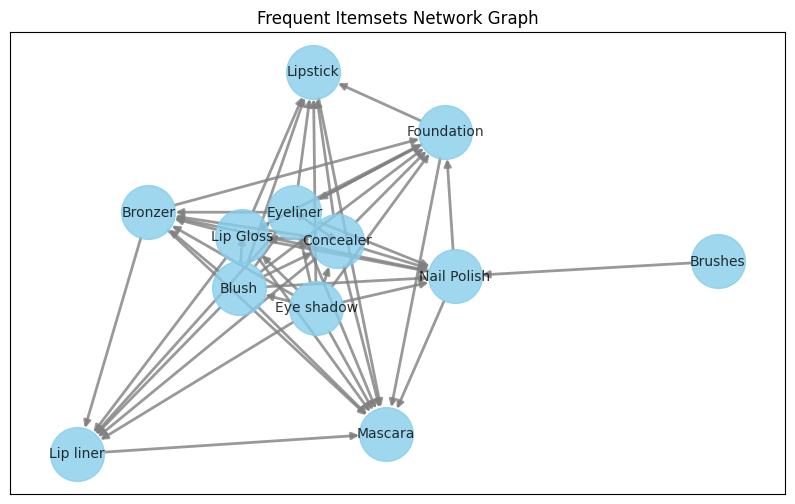

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have the frequent_itemsets dataframe with itemsets

# Create a directed graph
G = nx.DiGraph()

# Add edges and nodes based on frequent itemsets
for idx, row in frequent_itemsets.iterrows():
    itemset = list(row['itemsets'])
    support = row['support']

    # Add nodes
    for item in itemset:
        G.add_node(item)

    # Add edges
    for i in range(len(itemset) - 1):
        G.add_edge(itemset[i], itemset[i+1], weight=support)

# Set the plot size
plt.figure(figsize=(10, 6))

# Draw the network graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, edge_color='gray', width=2, alpha=0.8)

# Customize the plot
plt.title('Frequent Itemsets Network Graph')

# Show the plot
plt.show()


#### Let's take a look at our new association rules table.

In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3)

# Print the association rules
print("\nAssociation Rules:")
rules.sort_values('lift', ascending = False)


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Brushes),(Nail Polish),0.149,0.280,0.149,1.000000,3.571429,0.107280,inf
1,(Nail Polish),(Brushes),0.280,0.149,0.149,0.532143,3.571429,0.107280,1.818931
7,"(Eye shadow, Concealer)","(Eyeliner, Mascara)",0.201,0.175,0.114,0.567164,3.240938,0.078825,1.906034
8,"(Eyeliner, Mascara)","(Eye shadow, Concealer)",0.175,0.201,0.114,0.651429,3.240938,0.078825,2.292213
3,"(Eye shadow, Concealer)","(Blush, Mascara)",0.201,0.184,0.119,0.592040,3.217608,0.082016,2.000195
4,"(Blush, Mascara)","(Eye shadow, Concealer)",0.184,0.201,0.119,0.646739,3.217608,0.082016,2.261785
2,"(Eye shadow, Blush)","(Concealer, Mascara)",0.182,0.204,0.119,0.653846,3.205128,0.081872,2.299556
5,"(Concealer, Mascara)","(Eye shadow, Blush)",0.204,0.182,0.119,0.583333,3.205128,0.081872,1.963200
6,"(Eye shadow, Eyeliner)","(Concealer, Mascara)",0.182,0.204,0.114,0.626374,3.070459,0.076872,2.130471
9,"(Concealer, Mascara)","(Eye shadow, Eyeliner)",0.204,0.182,0.114,0.558824,3.070459,0.076872,1.854133


#### We can see the lift values became much higher, so in order to filter our results, we needed to increase the threshold value for our association rules.

#### Now, we can see some strong associations we didn't see before. The majority of these new association rules include groups of products. This shows us that, while certain groups items may be purchased less often than single items or other groups, it doesn't mean there can't be a high lift value association with a subsequent item. If we hadn't lowered our minimum support threshold, we wouldn't have seen some of these relationships.

## **Recommendation System**

#### Now it's time to try using these relationships we've found in order to recommend products to our customers based on what items they've already purchased.

#### A system like this can be used in many different ways, including product placement in stores, as well as customized recommendations while online shopping.

#### Let's have a try at it!

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have already generated frequent_itemsets and rules

# Get the first 10 transactions from your binary DataFrame
first_10_transactions = df.iloc[:10, :].copy()

# Function to recommend an item based on the rules
def recommend_item(transaction):
    purchased_items = set(transaction[transaction == 1].index)  # Get the items already purchased
    recommended_items = set()

    for _, rule in rules.iterrows():
        if rule['antecedents'].issubset(purchased_items):
            recommended_items.update(rule['consequents'])

    unrecommended_items = recommended_items - purchased_items

    if unrecommended_items:
        return unrecommended_items.pop()
    else:
        unpurchased_items = set(transaction[transaction == 0].index)  # Get the unpurchased items
        if unpurchased_items:
            return unpurchased_items.pop()
        else:
            return np.nan

# Apply the recommendation function to the first 10 transactions
first_10_transactions['RecommendedItem'] = first_10_transactions.apply(recommend_item, axis=1)

# Print the results
print(first_10_transactions['RecommendedItem'])


0    Eye shadow
1       Brushes
2      Eyeliner
3       Mascara
4      Eyeliner
5       Mascara
6      Eyeliner
7      Eyeliner
8       Mascara
9     Concealer
Name: RecommendedItem, dtype: object


In [ ]:
df.head(10)

,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner
0,0,1,1,1,1,0,1,1,1,0,0,0,0,1
1,0,0,1,0,1,0,1,1,0,0,1,1,0,0
2,0,1,0,0,1,1,1,1,1,1,1,1,1,0
3,0,0,1,1,1,0,1,0,0,0,1,0,0,1
4,0,1,0,0,1,0,1,1,1,1,0,1,1,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6,0,1,1,1,1,0,1,1,1,1,1,1,0,0
7,0,0,1,1,0,0,1,0,1,1,0,1,0,0
8,0,0,0,0,1,0,0,0,0,0,1,0,1,0
9,1,1,1,1,0,0,0,0,1,1,0,0,0,0


#### As we can see, we were able to recommend products the customer hasn't purchased yet. This took some tuning, and it can definitely be refined more with some further adjustments in threshold values.

#### Due to some of the thresholds set, my initial system was providing no recommendation to some customers. This is likely because they didnt have any strong associations with my algorithm based on their purchases. As a temporary fix to this, I adjusted the code to provide them with a recommendation of any item they had not already purchased.

## **Evaluating The System**
#### However, as we can see, the algorithm is working. We saw earlier that there was a strong lift value between nail polish and brushes. we can see this value below:




In [ ]:
rules[1:2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Nail Polish),(Brushes),0.292581,0.155695,0.155695,0.532143,3.417857,0.110142,1.804622


#### We see that the customer for transaction 1 purchased nail polish, but did not purchase brushes. We would expect, based on our model, that the system would recommend brushes to this customer. We can see that our system did exactly that!

#### As another example, lets look at transaction 2. Earlier, in our apriori model, we determined that there was a very high lift value between the purchase of Eye shadow and concealer, and Eyeliner and Mascara. We can see this value below:

In [ ]:
rules[10:11]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,"(Eye shadow, Concealer)","(Eyeliner, Mascara)",0.210031,0.182863,0.119122,0.567164,3.101578,0.080715,1.887868


#### If we look at this customer's purchases, we can see that the only one of these four items that they have not purchased is Eyeliner. Therefore, based on our association rules, we would hope that our system recommends Eyeliner to this customer. If we look at our recommender system output, we see that it does exactly that!

#### In this project, we were able to take a dataset of customer transactions, find a way to determine the relationships between different purchases and groups of purchases, and then create a recommendation system based on these findings.

#### This is just a raw system that could still use more adjustments and fine tuning, but, as we can see, it still does a pretty good job of recommending items that the user has not yet purchased. Overall, this system does appear to be successful!